動画の安定化前後でどれだけ画面上の移動が変化したか可視化してみる

In [4]:
# 動画から抽出したJsonファイルを開いてみる

import matplotlib.pyplot as plt
import json

with open('/home/yoshiaki/Videos/C0006.json', 'r') as f:
    data = json.load(f)

# plt.plot(data)
# plt.show()

In [5]:
data['optical_flow']

[-10.813606296781359,
 18.603167771380434,
 0.002647623045320408,
 -9.172623631832433,
 17.768456385790966,
 0.002714118199567179,
 -6.221867412373685,
 12.490610336831695,
 0.003086154037262262,
 -2.4291093871773857,
 9.354347369176383,
 -0.0024354356088769945,
 15.74366154123319,
 -39.0249897684295,
 0.0013259833695890707,
 13.949466839992311,
 -32.827922090613704,
 0.010290664104313342,
 22.994680477918124,
 -7.524752239249229,
 -0.005246883712224393,
 38.489539942963994,
 -26.770246346403617,
 -0.007812999798633669,
 22.467885839596068,
 -23.67824611616532,
 0.005741530974068154,
 14.726391059885497,
 -28.94007284717787,
 0.007168504671278474,
 18.220325282497285,
 -15.541030401544775,
 0.012301669635566715,
 6.026997611049606,
 14.086609452990679,
 0.009149583078665022,
 16.33865523867866,
 7.909819575178999,
 0.003573046298665794,
 16.458847254133072,
 -11.507577216145565,
 0.006609722885188281,
 4.626265460582724,
 -6.468912496264889,
 0.003482364477223069,
 -17.072569590159357,

In [6]:
type(data['optical_flow'])

list

In [7]:
import numpy as np
np_pose = np.array(data['optical_flow'])

In [8]:
row = np_pose.shape[0]/3
np_pose_2d = np.reshape(np_pose, (int(row),3))

In [9]:
np_pose_2d

array([[-1.08136063e+01,  1.86031678e+01,  2.64762305e-03],
       [-9.17262363e+00,  1.77684564e+01,  2.71411820e-03],
       [-6.22186741e+00,  1.24906103e+01,  3.08615404e-03],
       ...,
       [ 5.55486137e+01, -4.39616788e+01,  9.36251266e-03],
       [ 4.96779198e+01, -2.70669446e+01,  7.52539272e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

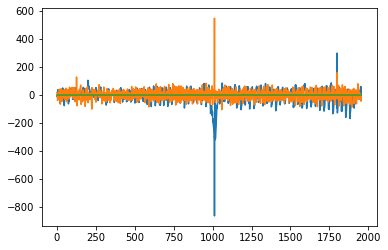

In [10]:
plt.plot(np_pose_2d)

In [11]:
# Jsonファイルを開いてnumpy arrayに変換する関数
import json
import numpy as np
def jsonToArray(path):
    with open(path, 'r') as f:
        data = json.load(f)
        np_pose = np.array(data['optical_flow'])
        row = np_pose.shape[0]/3
        np_pose_2d = np.reshape(np_pose, (int(row),3))
        return np_pose_2d


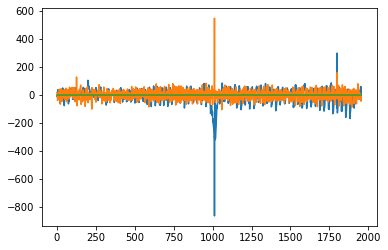

In [12]:
plt.plot(jsonToArray('/home/yoshiaki/Videos/C0006.json'))

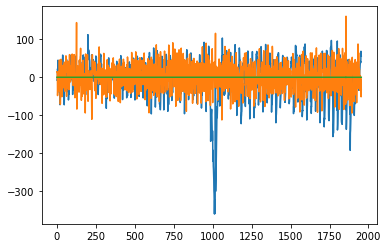

In [13]:
plt.plot(jsonToArray('/home/yoshiaki/Videos/C0006_stabilized_2022-11-3.4-35-43.json'))

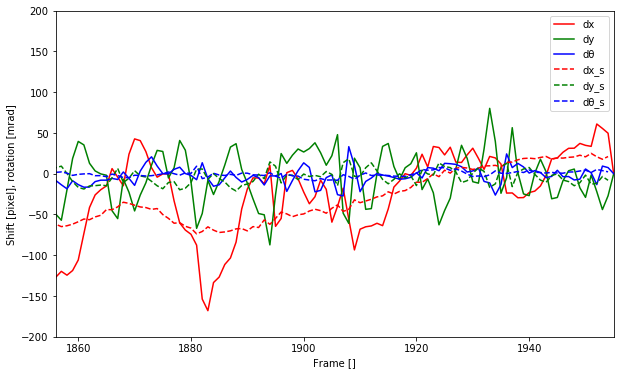

In [19]:
pose2d = jsonToArray('/home/yoshiaki/Videos/C0006.json')

stabilized_pose2d = jsonToArray('/home/yoshiaki/Videos/C0006_stabilized_2022-11-3.9-31-37.json')
plt.figure(figsize=(10,6))

plt.plot(pose2d[:,0], 'r',label='dx')
plt.plot(pose2d[:,1], 'g',label='dy')
plt.plot(pose2d[:,2]*1000, 'b',label='dθ')
plt.plot(stabilized_pose2d[:,0],'r--', label='dx_s')
plt.plot(stabilized_pose2d[:,1], 'g--',label='dy_s')
plt.plot(stabilized_pose2d[:,2]*1000, 'b--',label='dθ_s')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Shift [pixel], rotation [mrad]')
plt.ylim(-200,200)
plt.xlim(pose2d.shape[0]-100,pose2d.shape[0]-1)
plt.show()

In [27]:
pose2d.shape[0]

1955